# visualization
> 用来进行可视化的部分

In [ ]:
#| default_exp visualization

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from wcpdtoolbox.imports import *

In [ ]:
from fastai.test_utils import *

## Callback

In [ ]:
#| export
class GradShowCallback(Callback):
    def __init__(self, l): self.grad_list = l
    def before_step(self):
        grads = L([to_detach(i.grad.abs().mean()) for i in self.learn.model.parameters()])
        self.grad_list.append(grads)
    
    def after_fit(self):
        name = [name for name, _ in self.learn.model.named_parameters()]
        for name, i in zip(name,array(self.grad_list).T): plt.plot(i, label=name)
        plt.legend()
        plt.show()

显示各层的grad曲线
```python
grad.abs().mean()
```

In [ ]:
learner = synth_learner()

In [ ]:
l = L()

epoch,train_loss,valid_loss,time
0,0.010716,0.012582,00:00
1,0.010722,0.012388,00:00
2,0.010702,0.012258,00:00
3,0.010705,0.012107,00:00
4,0.010657,0.012052,00:00
5,0.010607,0.011998,00:00
6,0.010610,0.011936,00:00
7,0.010608,0.011916,00:00
8,0.010613,0.011904,00:00
9,0.010603,0.011903,00:00


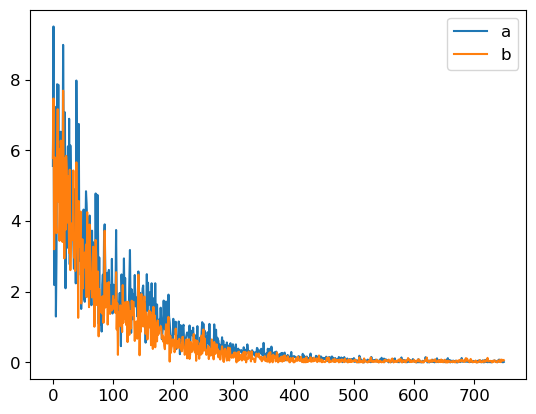

In [ ]:
learner.fit_one_cycle(10, cbs=GradShowCallback(l))

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()